In [1]:

! pip install scikit-plot
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import scikitplot as skplt

# scipy
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

# scikit

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors

In [2]:
data = pd.read_csv("CC GENERAL.csv")

In [3]:
val = data.loc[((data['MINIMUM_PAYMENTS'].isnull())&(data['PAYMENTS']==0))].index

In [4]:
dfd = data.copy()
dfd.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [5]:
#for values with 0 payments, set minimum payments as 0. 
for i in val:
  data.iloc[i,15] = 0

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
data.loc[((data['MINIMUM_PAYMENTS'].isnull()))]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
54,C10056,6.660517,0.636364,310.00,0.00,310.00,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
99,C10104,0.000000,0.000000,0.00,0.00,0.00,89.849004,0.000000,0.000000,0.000000,0.142857,1,0,3000.0,138.021428,NaN,0.0,7
146,C10152,19.354559,0.909091,689.70,0.00,689.70,0.000000,0.833333,0.000000,0.833333,0.000000,0,10,10000.0,746.691026,NaN,0.0,12
319,C10330,0.478714,0.090909,734.97,159.00,575.97,0.000000,0.833333,0.083333,0.750000,0.000000,0,16,6000.0,1159.135064,NaN,0.0,12
1155,C11198,34.207779,0.090909,2483.26,2483.26,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,10000.0,29272.486070,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8561,C18794,3.229304,0.545455,190.20,0.00,190.20,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1500.0,295.937124,NaN,0.0,12
8593,C18827,16.887571,0.363636,1083.00,1083.00,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,3,1200.0,3905.430817,NaN,0.0,12
8647,C18882,0.006651,0.142857,0.00,0.00,0.00,164.137866,0.000000,0.000000,0.000000,0.142857,1,0,1200.0,5.070726,NaN,0.0,7
8753,C18992,0.223351,0.090909,336.00,0.00,336.00,0.000000,1.000000,0.000000,0.916667,0.000000,0,12,1000.0,578.819329,NaN,0.0,12


In [7]:
#set the remaining missing values based on the median proportion of minimum payments to payments
mean_prop = data['MINIMUM_PAYMENTS']/data['PAYMENTS']
mean_prop = mean_prop.median()
data.fillna(value={'MINIMUM_PAYMENTS':mean_prop*data['PAYMENTS']},inplace=True)

In [8]:
data['MINIMUM_PAYMENTS']/data['PAYMENTS']

0       0.691320
1       0.261353
2       1.008388
3            NaN
4       0.360871
          ...   
8945    0.150145
8946    0.460724
8947    1.014121
8948    1.061002
8949    1.397742
Length: 8950, dtype: float64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CREDIT

In [10]:

data.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [13]:
data.drop(['CUST_ID'], axis=1, inplace=True)

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8949.0,1564.647593,2081.584016,0.0,128.365782,873.680279,2054.372848,19043.13856
BALANCE_FREQUENCY,8949.0,0.877350,0.236798,0.0,0.888889,1.000000,1.000000,1.00000
PURCHASES,8949.0,1003.316936,2136.727848,0.0,39.800000,361.490000,1110.170000,49039.57000
ONEOFF_PURCHASES,8949.0,592.503572,1659.968851,0.0,0.000000,38.000000,577.830000,40761.25000
INSTALLMENTS_PURCHASES,8949.0,411.113579,904.378205,0.0,0.000000,89.000000,468.650000,22500.00000
CASH_ADVANCE,8949.0,978.959616,2097.264344,0.0,0.000000,0.000000,1113.868654,47137.21176
PURCHASES_FREQUENCY,8949.0,0.490405,0.401360,0.0,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8949.0,0.202480,0.298345,0.0,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8949.0,0.364478,0.397451,0.0,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8949.0,0.135141,0.200132,0.0,0.000000,0.000000,0.222222,1.50000


In [17]:
#scale the data
sc = StandardScaler()
scaled_data = sc.fit_transform(data)

In [19]:
#PCA
pca = PCA()
pca_s_data = pca.fit_transform(scaled_data)

In [34]:
#dimensionality reduction
from umap import UMAP
umap = UMAP(random_state=123)
reduced_data = umap.fit_transform(pca_s_data)

In [35]:
#into Data Frame for ease of use
reduced_df = pd.DataFrame(columns=('Component 1','Component 2'), data = reduced_data)
reduced_df.head()


,Component 1,Component 2
0,5.169043,3.074199
1,7.904676,8.677421
2,3.008638,9.481008
3,5.439641,2.325608
4,6.585831,4.014616


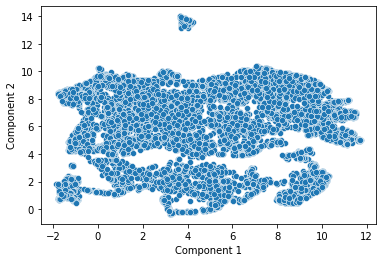

In [36]:
# graph points
sns.scatterplot(data=reduced_df,x='Component 1',y='Component 2')

In [48]:
#clustering
k3 = KMeans(n_clusters=3,random_state=123)
model = k3.fit(reduced_df)
labels = k3.predict(reduced_df)

In [49]:
#adding labels to the reduced dataset
reduced_df['cluster label'] = labels

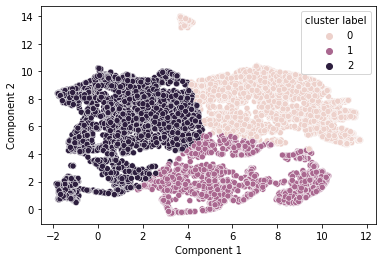

In [50]:
#graphing clustered data scatterplot
sns.scatterplot(data=reduced_df,x='Component 1',y='Component 2',hue='cluster label')

In [51]:
#adding labels to the original dataset
data['cluster labels'] = labels

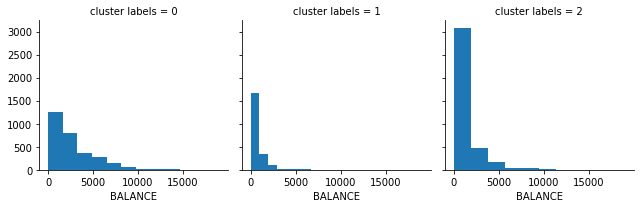

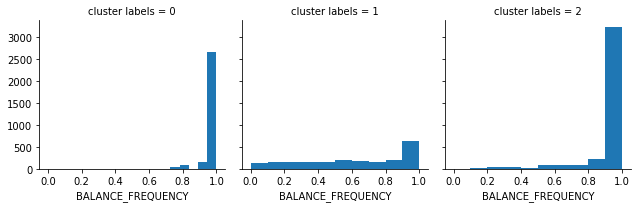

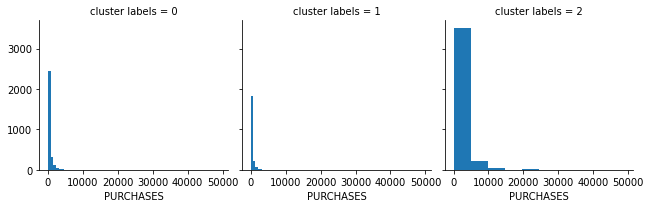

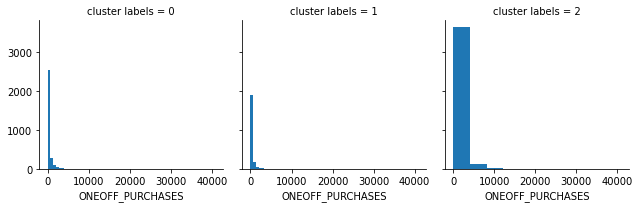

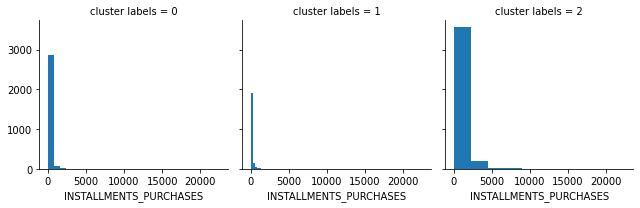

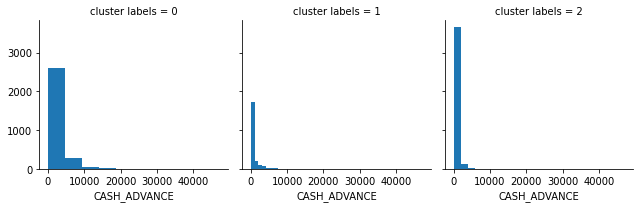

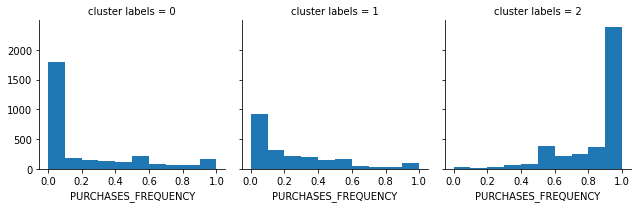

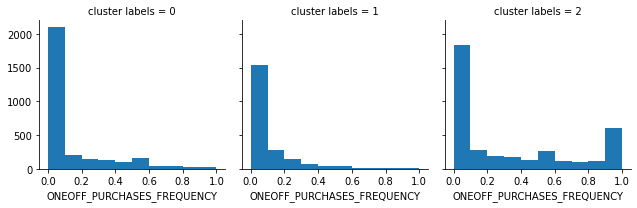

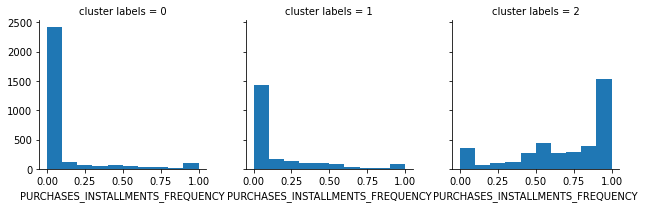

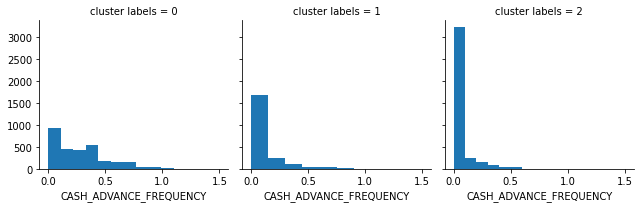

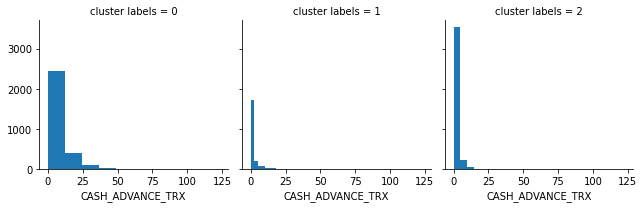

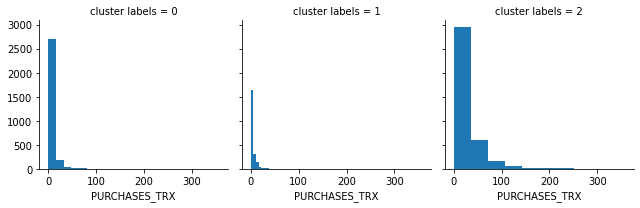

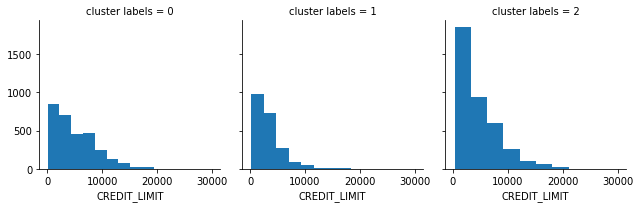

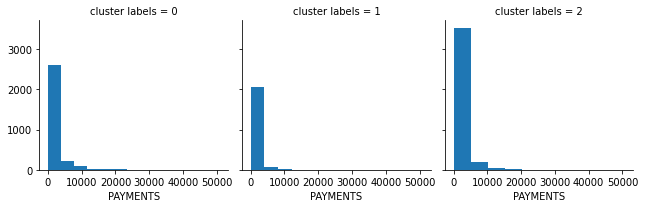

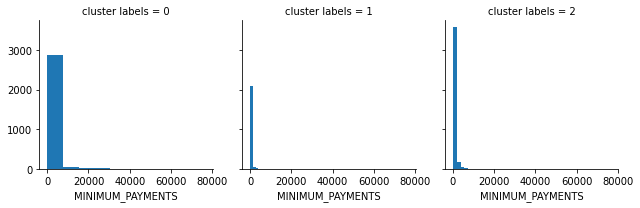

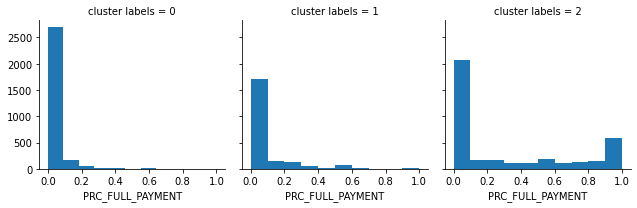

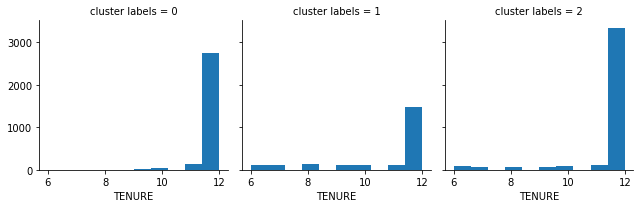

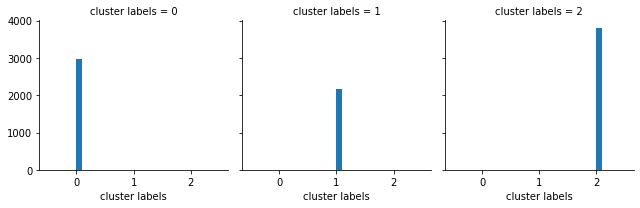

In [52]:
#analyze the clusters 
for c in data:
    grid= sns.FacetGrid(data, col='cluster labels')
    grid.map(plt.hist, c)

In [54]:
### Cluster analysis
data.groupby('cluster labels').BALANCE.describe().T

cluster labels,0,1,2
count,2967.000000,2165.000000,3817.000000
mean,2800.038713,619.885051,1140.231939
std,2453.633724,1007.202939,1741.396449
min,0.488050,0.000000,0.000000
25%,1087.920500,19.491307,90.582466
50%,1938.648722,168.539199,452.094148
75%,3904.687252,916.627912,1473.542308
max,16304.889250,9601.071318,19043.138560


In [55]:
data.groupby('cluster labels').BALANCE_FREQUENCY.describe().T

cluster labels,0,1,2
count,2967.000000,2165.000000,3817.000000
mean,0.984332,0.622190,0.938919
std,0.053592,0.317060,0.150386
min,0.454545,0.000000,0.000000
25%,1.000000,0.363636,1.000000
50%,1.000000,0.636364,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [56]:
data.groupby('cluster labels').PURCHASES.describe().T

cluster labels,0,1,2
count,2967.000000,2165.000000,3817.000000
mean,385.285666,339.521640,1860.224349
std,753.281438,546.516678,2968.813718
min,0.000000,0.000000,0.000000
25%,0.000000,0.240000,428.000000
50%,0.000000,133.160000,955.870000
75%,454.170000,415.040000,2204.540000
max,7739.480000,6520.000000,49039.570000


In [57]:
data.groupby('cluster labels').ONEOFF_PURCHASES.describe().T

cluster labels,0,1,2
count,2967.000000,2165.000000,3817.000000
mean,287.389791,240.055058,1029.580760
std,609.146703,493.532824,2387.631436
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,215.000000
75%,294.000000,259.130000,1169.630000
max,6678.260000,6520.000000,40761.250000


In [58]:
data.groupby('cluster labels').INSTALLMENTS_PURCHASES.describe().T

cluster labels,0,1,2
count,2967.000000,2165.000000,3817.000000
mean,98.081095,99.789677,831.020215
std,341.042544,230.935261,1220.521746
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,225.000000
50%,0.000000,0.000000,476.660000
75%,0.000000,100.500000,1020.530000
max,7739.480000,2751.040000,22500.000000


In [59]:
data.groupby('cluster labels').CASH_ADVANCE.describe().T

cluster labels,0,1,2
count,2967.000000,2165.000000,3817.000000
mean,2087.166434,685.866858,283.779158
std,2975.153811,1448.335813,870.313506
min,0.000000,0.000000,0.000000
25%,189.665030,0.000000,0.000000
50%,1115.920030,0.000000,0.000000
75%,2837.671284,752.292181,0.000000
max,47137.211760,10590.411130,19513.474830


In [60]:
data.groupby('cluster labels').PURCHASES_FREQUENCY.describe().T

cluster labels,0,1,2
count,2967.000000,2165.000000,3817.000000
mean,0.206686,0.239509,0.853252
std,0.293772,0.256883,0.207941
min,0.000000,0.000000,0.000000
25%,0.000000,0.083333,0.750000
50%,0.000000,0.166667,1.000000
75%,0.333333,0.333333,1.000000
max,1.000000,1.000000,1.000000


In [61]:
data.groupby('cluster labels').ONEOFF_PURCHASES_FREQUENCY.describe().T

cluster labels,0,1,2
count,2967.000000,2165.000000,3817.000000
mean,0.126621,0.097328,0.321089
std,0.209638,0.151573,0.369742
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.166667
75%,0.166667,0.142857,0.583333
max,1.000000,1.000000,1.000000


In [62]:
data.groupby('cluster labels').PURCHASES_INSTALLMENTS_FREQUENCY.describe().T

cluster labels,0,1,2
count,2967.000000,2165.000000,3817.000000
mean,0.098835,0.144820,0.695555
std,0.235800,0.245289,0.318111
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.500000
50%,0.000000,0.000000,0.818182
75%,0.000000,0.250000,1.000000
max,1.000000,1.000000,1.000000


In [63]:
data.groupby('cluster labels').CASH_ADVANCE_FREQUENCY.describe().T

cluster labels,0,1,2
count,2967.000000,2165.000000,3817.000000
mean,0.276597,0.094282,0.048361
std,0.229987,0.174185,0.107531
min,0.000000,0.000000,0.000000
25%,0.083333,0.000000,0.000000
50%,0.250000,0.000000,0.000000
75%,0.416667,0.125000,0.000000
max,1.100000,1.500000,1.000000


In [64]:
data.groupby('cluster labels').CASH_ADVANCE_TRX.describe().T

cluster labels,0,1,2
count,2967.000000,2165.000000,3817.000000
mean,7.286148,1.752425,0.959916
std,9.912770,3.600633,2.512592
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000
75%,10.000000,2.000000,0.000000
max,123.000000,26.000000,48.000000


In [65]:
data.groupby('cluster labels').CREDIT_LIMIT.describe().T

cluster labels,0,1,2
count,2967.000000,2165.000000,3817.000000
mean,5041.951875,3363.913267,4710.108645
std,3699.782297,2920.167591,3816.865666
min,50.000000,150.000000,300.000000
25%,2000.000000,1500.000000,1700.000000
50%,4000.000000,2500.000000,3500.000000
75%,7500.000000,4000.000000,6500.000000
max,21500.000000,23000.000000,30000.000000


In [66]:
data.groupby('cluster labels').PAYMENTS.describe().T

cluster labels,0,1,2
count,2967.000000,2165.000000,3817.000000
mean,1996.315980,1008.122135,1940.260545
std,2928.269064,2403.657300,3052.624137
min,0.000000,0.000000,0.000000
25%,535.818262,182.462948,495.427538
50%,1071.874614,388.040315,1074.956132
75%,2161.148132,901.464465,2238.594868
max,39048.597620,40627.595240,50721.483360


In [67]:
data.groupby('cluster labels').MINIMUM_PAYMENTS.describe().T

cluster labels,0,1,2
count,2967.000000,2165.000000,3817.000000
mean,1527.046225,302.928854,608.861986
std,3728.309804,567.161198,1129.986329
min,0.000000,0.000000,0.000000
25%,339.679605,81.595815,162.966327
50%,681.959088,162.398092,204.477134
75%,1431.555478,325.882925,617.994101
max,76406.207520,13486.546510,18621.013310


In [68]:
data.groupby('cluster labels').PRC_FULL_PAYMENT.describe().T

cluster labels,0,1,2
count,2967.000000,2165.000000,3817.000000
mean,0.027369,0.064353,0.302651
std,0.078508,0.145677,0.380365
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.083333
75%,0.000000,0.000000,0.636364
max,0.916667,1.000000,1.000000


In [71]:
data.groupby('cluster labels').TENURE.describe().T

cluster labels,0,1,2
count,2967.000000,2165.000000,3817.000000
mean,11.897877,10.861432,11.594970
std,0.448289,1.917960,1.259952
min,6.000000,6.000000,6.000000
25%,12.000000,10.000000,12.000000
50%,12.000000,12.000000,12.000000
75%,12.000000,12.000000,12.000000
max,12.000000,12.000000,12.000000


### Cluster 0:
* Highest balance, followed by cluster 2.
* Highest Balance_Frequency followed by cluster 2
* Highest cash advance, followed by cluster 1
* Highest cash advance frequency, followed by cluster 1
* Highest Cash advance trx, followed by cluster 1
* Highest Credit limit, followed by cluster 2
* Highest Payments, followed closely by cluster 2
* Highest minimum payments, followed by cluster 2

### Cluster 2:
* Highest Purchases, followed by cluster 0. (Has outliers in it)
* Highest purchase frequency, followed by cluster 1
* Highest One_Off_Purchases, followed by cluster 0
* Highest One off purchases frequency, followed by cluster 0
* Highest Installment Purchases, followed by cluster 0
* Highest installment purchases frequency, followed by cluster 1.
* Highest percentage full payment, followed by cluster 1
Tenure is similar for all clusters

### Conclusions:
Cluster 0 has people with the most money, more amount than volume of purchases and higher but not complete payments.

Cluster 2 has the most active users, lots of purchases and highest full payments, lower balances and limits than cluster 0.

Cluster 1 is people with the lowest balances and less active, second with cash advances probably to pay off bills.

### Initial Strategies:
Incentivize people in cluster 0 to put more money into the bank by increasing yields.

For people in cluster 2, decrease interest rates to increase spending.

For people in cluster 1, offer financial advice and management to keep them as customers.